In [2]:
import pandas as pd
import numpy as np
import os

In [163]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.base import clone
from sklearn.tree import DecisionTreeClassifier

In [167]:
sns.set_style(style='white')

In [70]:
data=pd.read_csv("ObesityDataSet.csv")

In [71]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [72]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [73]:
data["CAEC"].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [74]:
data["CALC"].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [173]:
data["NObeyesdad"].value_counts()/len(data)*100

Obesity_Type_I         16.627191
Obesity_Type_III       15.348176
Obesity_Type_II        14.069162
Overweight_Level_I     13.737565
Overweight_Level_II    13.737565
Normal_Weight          13.595452
Insufficient_Weight    12.884889
Name: NObeyesdad, dtype: float64

In [76]:
numeric=["Age","Height","Weight","FCVC","NCP","CH2O","FAF","TUE"]
ordinal=["CAEC","CALC"]
flags=["family_history_with_overweight","FAVC","SMOKE","SCC"]
categorical=["MTRANS","Gender"]

In [77]:
data.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [78]:
data["CAEC"]=data["CAEC"].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})

In [79]:
data["CALC"]=data["CALC"].map({"no":0,"Sometimes":1,"Frequently":2,"Always":3})

In [80]:
data["Gender"]=data["Gender"].map({"Female":0,"Male":1})

In [81]:
len(numeric+ordinal+flags+categorical)

16

In [82]:
len(data.columns)

17

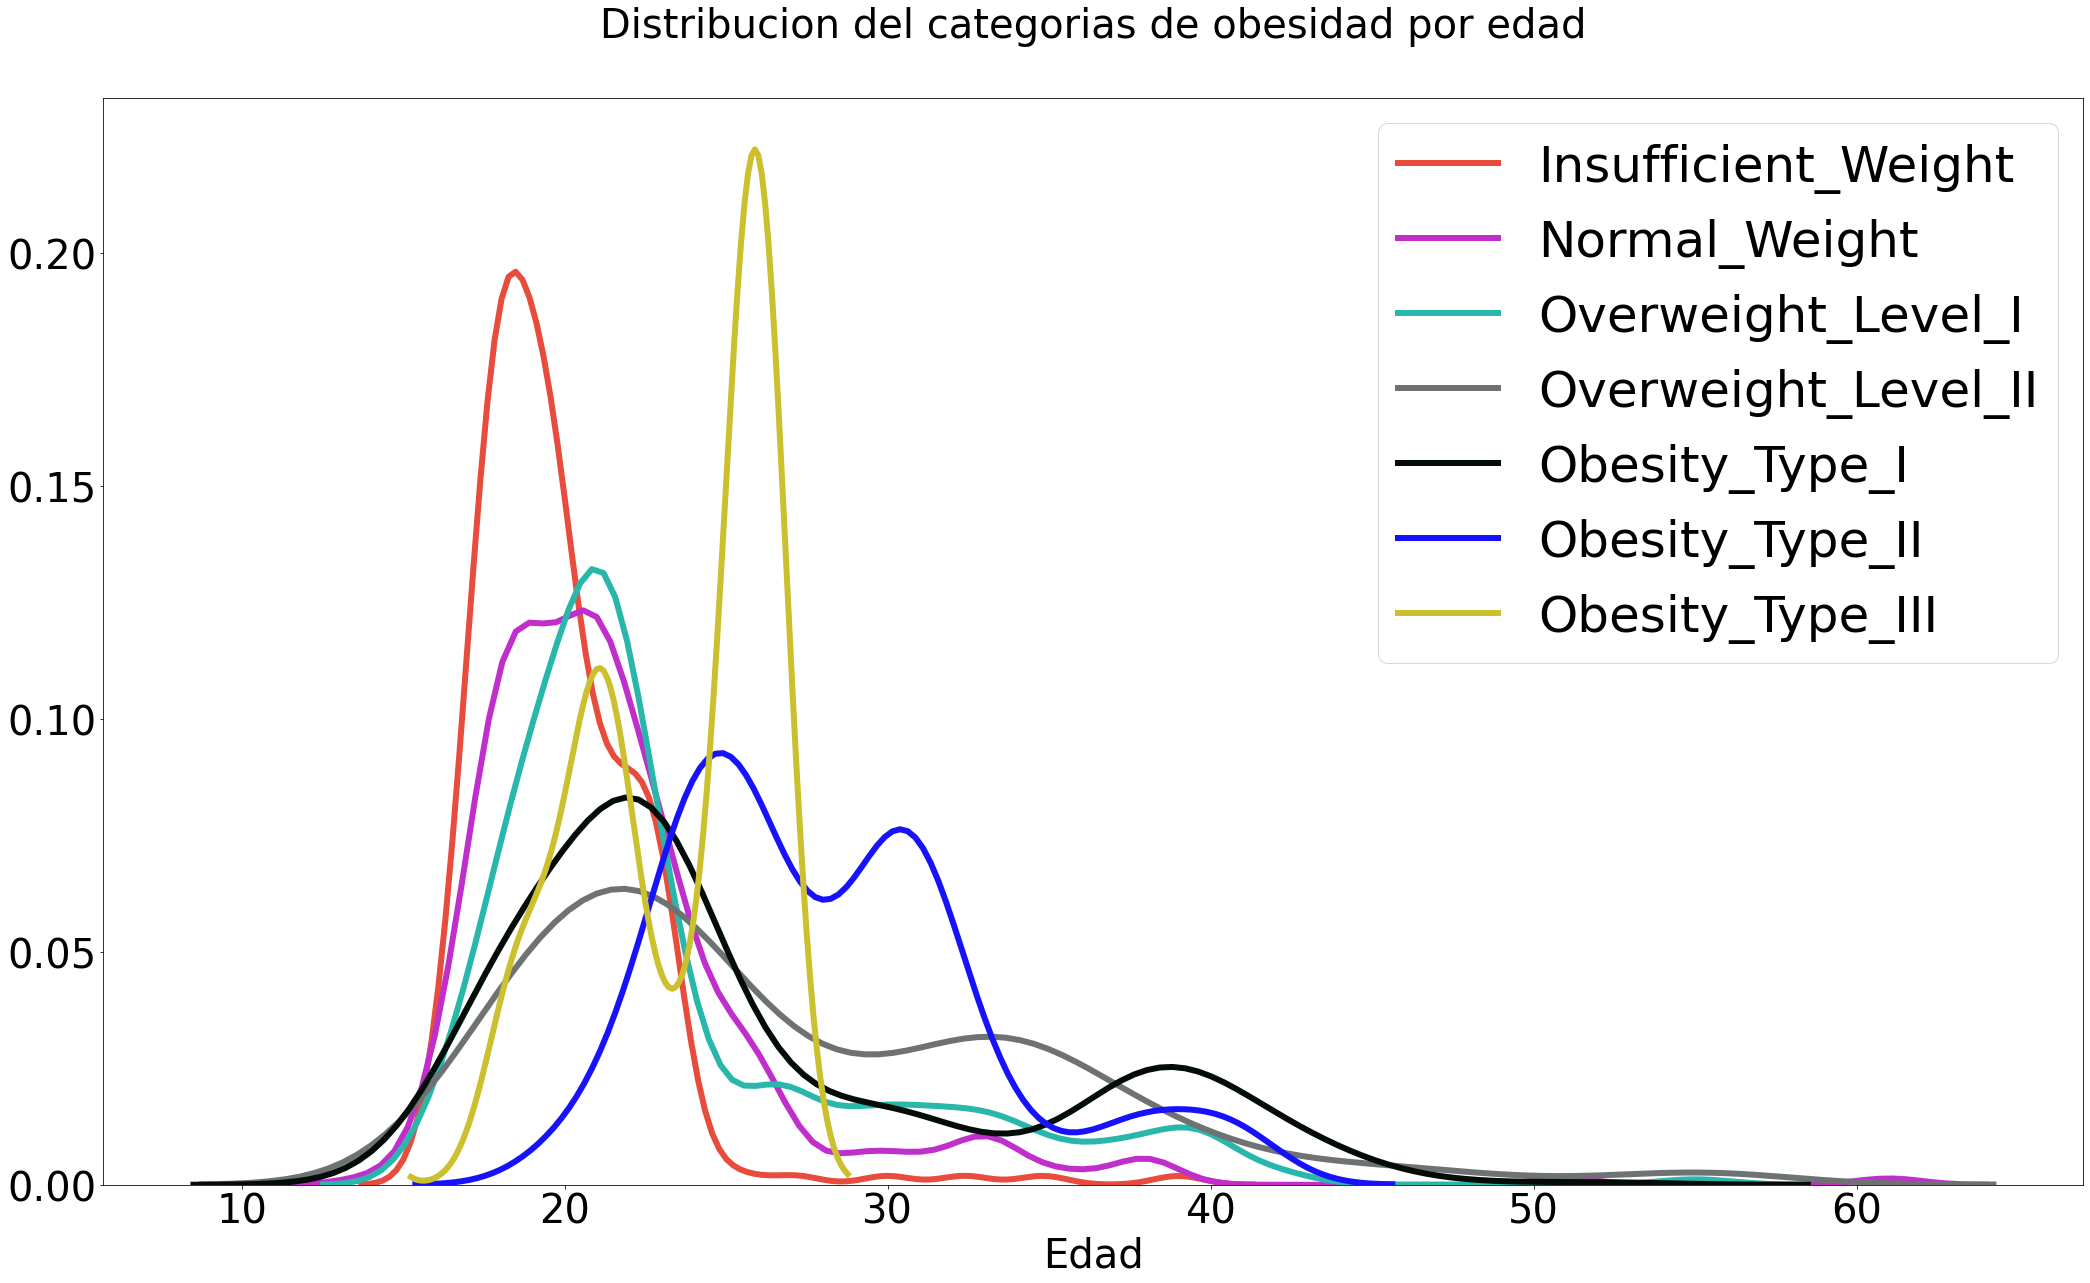

In [123]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

# Distribution of feature in dataset
#sns.distplot(dataset["Edad"], label='Distribucion de edad', hist=False, color='#e74c3c', ax=axs)
sns.distplot(data[data["NObeyesdad"]=="Insufficient_Weight"]["Age"], label='Insufficient_Weight', hist=False, color='#e74c3c', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Normal_Weight"]["Age"], label='Normal_Weight', hist=False, color='#c02ecc', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_I"]["Age"], label='Overweight_Level_I', hist=False, color='#29b7ac', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_II"]["Age"], label='Overweight_Level_II', hist=False, color='#6e7272', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_I"]["Age"], label='Obesity_Type_I', hist=False, color='#030c07', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_II"]["Age"], label='Obesity_Type_II', hist=False, color='#1712fd', ax=axs,kde_kws=dict(linewidth=6))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_III"]["Age"], label='Obesity_Type_III', hist=False, color='#ccc02e', ax=axs,kde_kws=dict(linewidth=6))


axs.tick_params(axis='x', labelsize=40)
axs.tick_params(axis='y', labelsize=40)
axs.set_xlabel('Edad', fontsize=40)
axs.legend(loc='upper right', prop={'size': 50})
axs.set_title('Distribucion del categorias de obesidad por {}'.format("edad"), size=40, y=1.05)
    
plt.show()

In [84]:
for column in flags:
    data[column]=data[column].map({"yes":1,"no":0})

In [85]:
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,21.0,1.62,64.0,1,0,2.0,3.0,1,0,2.0,0,0.0,1.0,0,Public_Transportation,Normal_Weight
1,0,21.0,1.52,56.0,1,0,3.0,3.0,1,1,3.0,1,3.0,0.0,1,Public_Transportation,Normal_Weight
2,1,23.0,1.80,77.0,1,0,2.0,3.0,1,0,2.0,0,2.0,1.0,2,Public_Transportation,Normal_Weight
3,1,27.0,1.80,87.0,0,0,3.0,3.0,1,0,2.0,0,2.0,0.0,2,Walking,Overweight_Level_I
4,1,22.0,1.78,89.8,0,0,2.0,1.0,1,0,2.0,0,0.0,0.0,1,Public_Transportation,Overweight_Level_II


In [86]:
data["NObeyesdad"].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [87]:
data["NObeyesdad_num"]=data["NObeyesdad"].map({"Insufficient_Weight":0,"Normal_Weight":1,"Overweight_Level_I":2,
                                           "Overweight_Level_II":3,"Obesity_Type_I":4,"Obesity_Type_II":5,
                                           "Obesity_Type_III":6})

In [88]:
data["BMI"]=data["Weight"]/(data["Height"]*data["Height"])

In [89]:
continuous_features_train=data[['Gender', 'Age', 'Height', 'Weight','BMI', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'NObeyesdad_num']]

In [63]:
correlation_train=continuous_features_train.corr()

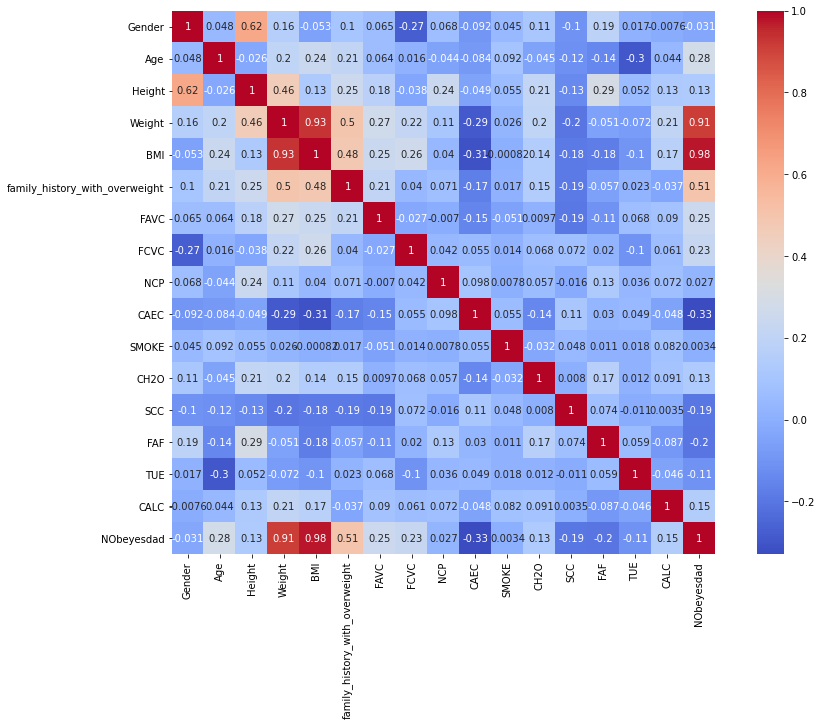

In [64]:
plt.subplots(figsize=(15,10))
sns.heatmap(correlation_train, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 10})

In [127]:
correlation_train["abs_NObeyesdad_num"]=abs(correlation_train["NObeyesdad_num"])

In [133]:
correlation_train.sort_values(by=["abs_NObeyesdad_num"],ascending=False).head(10).reset_index()

,index,Gender,Age,Height,Weight,BMI,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,NObeyesdad_num,abs_NObeyesdad_num
0,NObeyesdad_num,-0.031464,0.282913,0.133565,0.913251,0.977826,0.505148,0.247793,0.227759,0.026690,-0.329350,0.003442,0.133008,-0.194508,-0.199901,-0.107991,0.151752,1.000000,1.000000
1,BMI,-0.053035,0.244163,0.131785,0.934806,1.000000,0.483508,0.246097,0.263651,0.039969,-0.313278,-0.000819,0.144200,-0.184286,-0.177537,-0.099720,0.169805,0.977826,0.977826
2,Weight,0.161668,0.202560,0.463136,1.000000,0.934806,0.496820,0.272300,0.216125,0.107469,-0.287493,0.025746,0.200575,-0.201906,-0.051436,-0.071561,0.206677,0.913251,0.913251
3,family_history_with_overweight,0.102512,0.205725,0.247684,0.496820,0.483508,1.000000,0.208036,0.040372,0.071370,-0.169787,0.017385,0.147437,-0.185422,-0.056673,0.022943,-0.036676,0.505148,0.505148
4,CAEC,-0.091543,-0.083739,-0.048818,-0.287493,-0.313278,-0.169787,-0.150068,0.054670,0.097801,1.000000,0.055282,-0.144995,0.109179,0.030110,0.048567,-0.047540,-0.329350,0.329350
5,Age,0.048394,1.000000,-0.025958,0.202560,0.244163,0.205725,0.063902,0.016291,-0.043944,-0.083739,0.091987,-0.045304,-0.116283,-0.144938,-0.296931,0.044487,0.282913,0.282913
6,FAVC,0.064934,0.063902,0.178364,0.272300,0.246097,0.208036,1.000000,-0.027283,-0.007000,-0.150068,-0.050660,0.009719,-0.190658,-0.107995,0.068417,0.089520,0.247793,0.247793
7,FCVC,-0.274505,0.016291,-0.038121,0.216125,0.263651,0.040372,-0.027283,1.000000,0.042216,0.054670,0.014320,0.068461,0.071852,0.019939,-0.101135,0.060781,0.227759,0.227759
8,FAF,0.189607,-0.144938,0.294709,-0.051436,-0.177537,-0.056673,-0.107995,0.019939,0.129504,0.030110,0.011216,0.167236,0.074221,1.000000,0.058562,-0.086799,-0.199901,0.199901
9,SCC,-0.102633,-0.116283,-0.133753,-0.201906,-0.184286,-0.185422,-0.190658,0.071852,-0.015624,0.109179,0.047731,0.008036,1.000000,0.074221,-0.010928,0.003463,-0.194508,0.194508


In [134]:
list(correlation_train.sort_values(by=["abs_NObeyesdad_num"],ascending=False).head(10).reset_index()["index"])

['NObeyesdad_num',
 'BMI',
 'Weight',
 'family_history_with_overweight',
 'CAEC',
 'Age',
 'FAVC',
 'FCVC',
 'FAF',
 'SCC']

In [145]:
continuous_features_train=data[[
 'BMI',
 'Weight',
 'family_history_with_overweight',
 'CAEC',
 'Age',
 'NObeyesdad_num']]
correlation_train=continuous_features_train.corr()

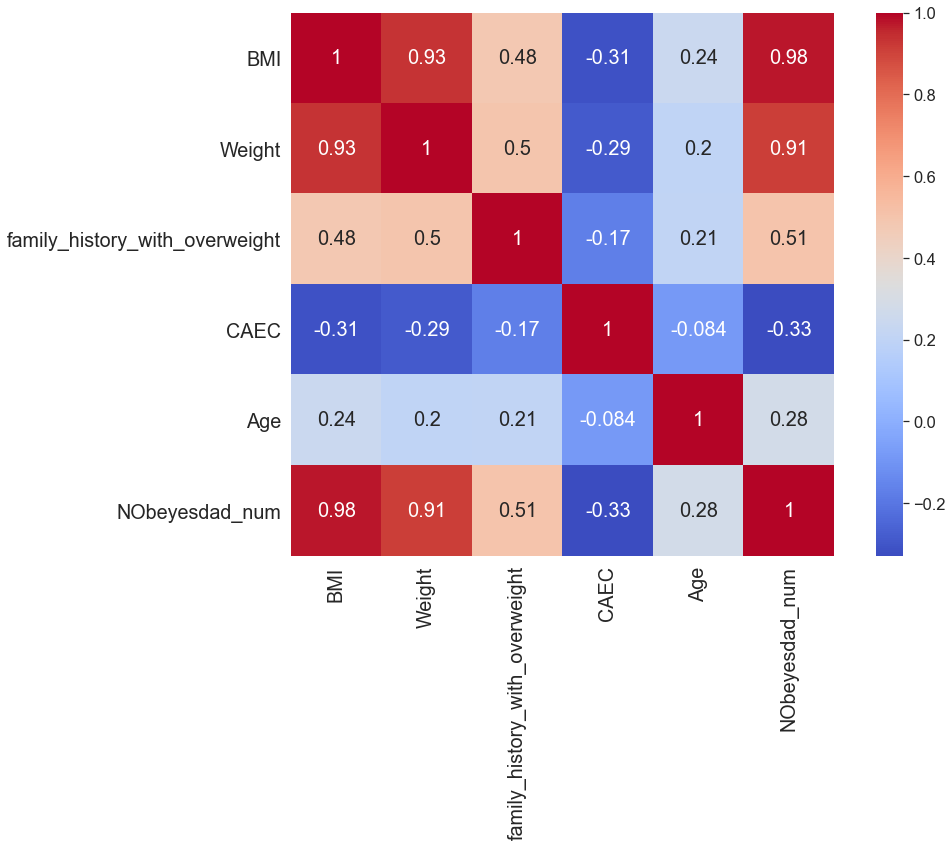

In [157]:
plt.subplots(figsize=(15,10))
#sns.set(font_scale=1.5)
sns.heatmap(correlation_train, annot=True, square=True, cmap='coolwarm', annot_kws={'size': 20})

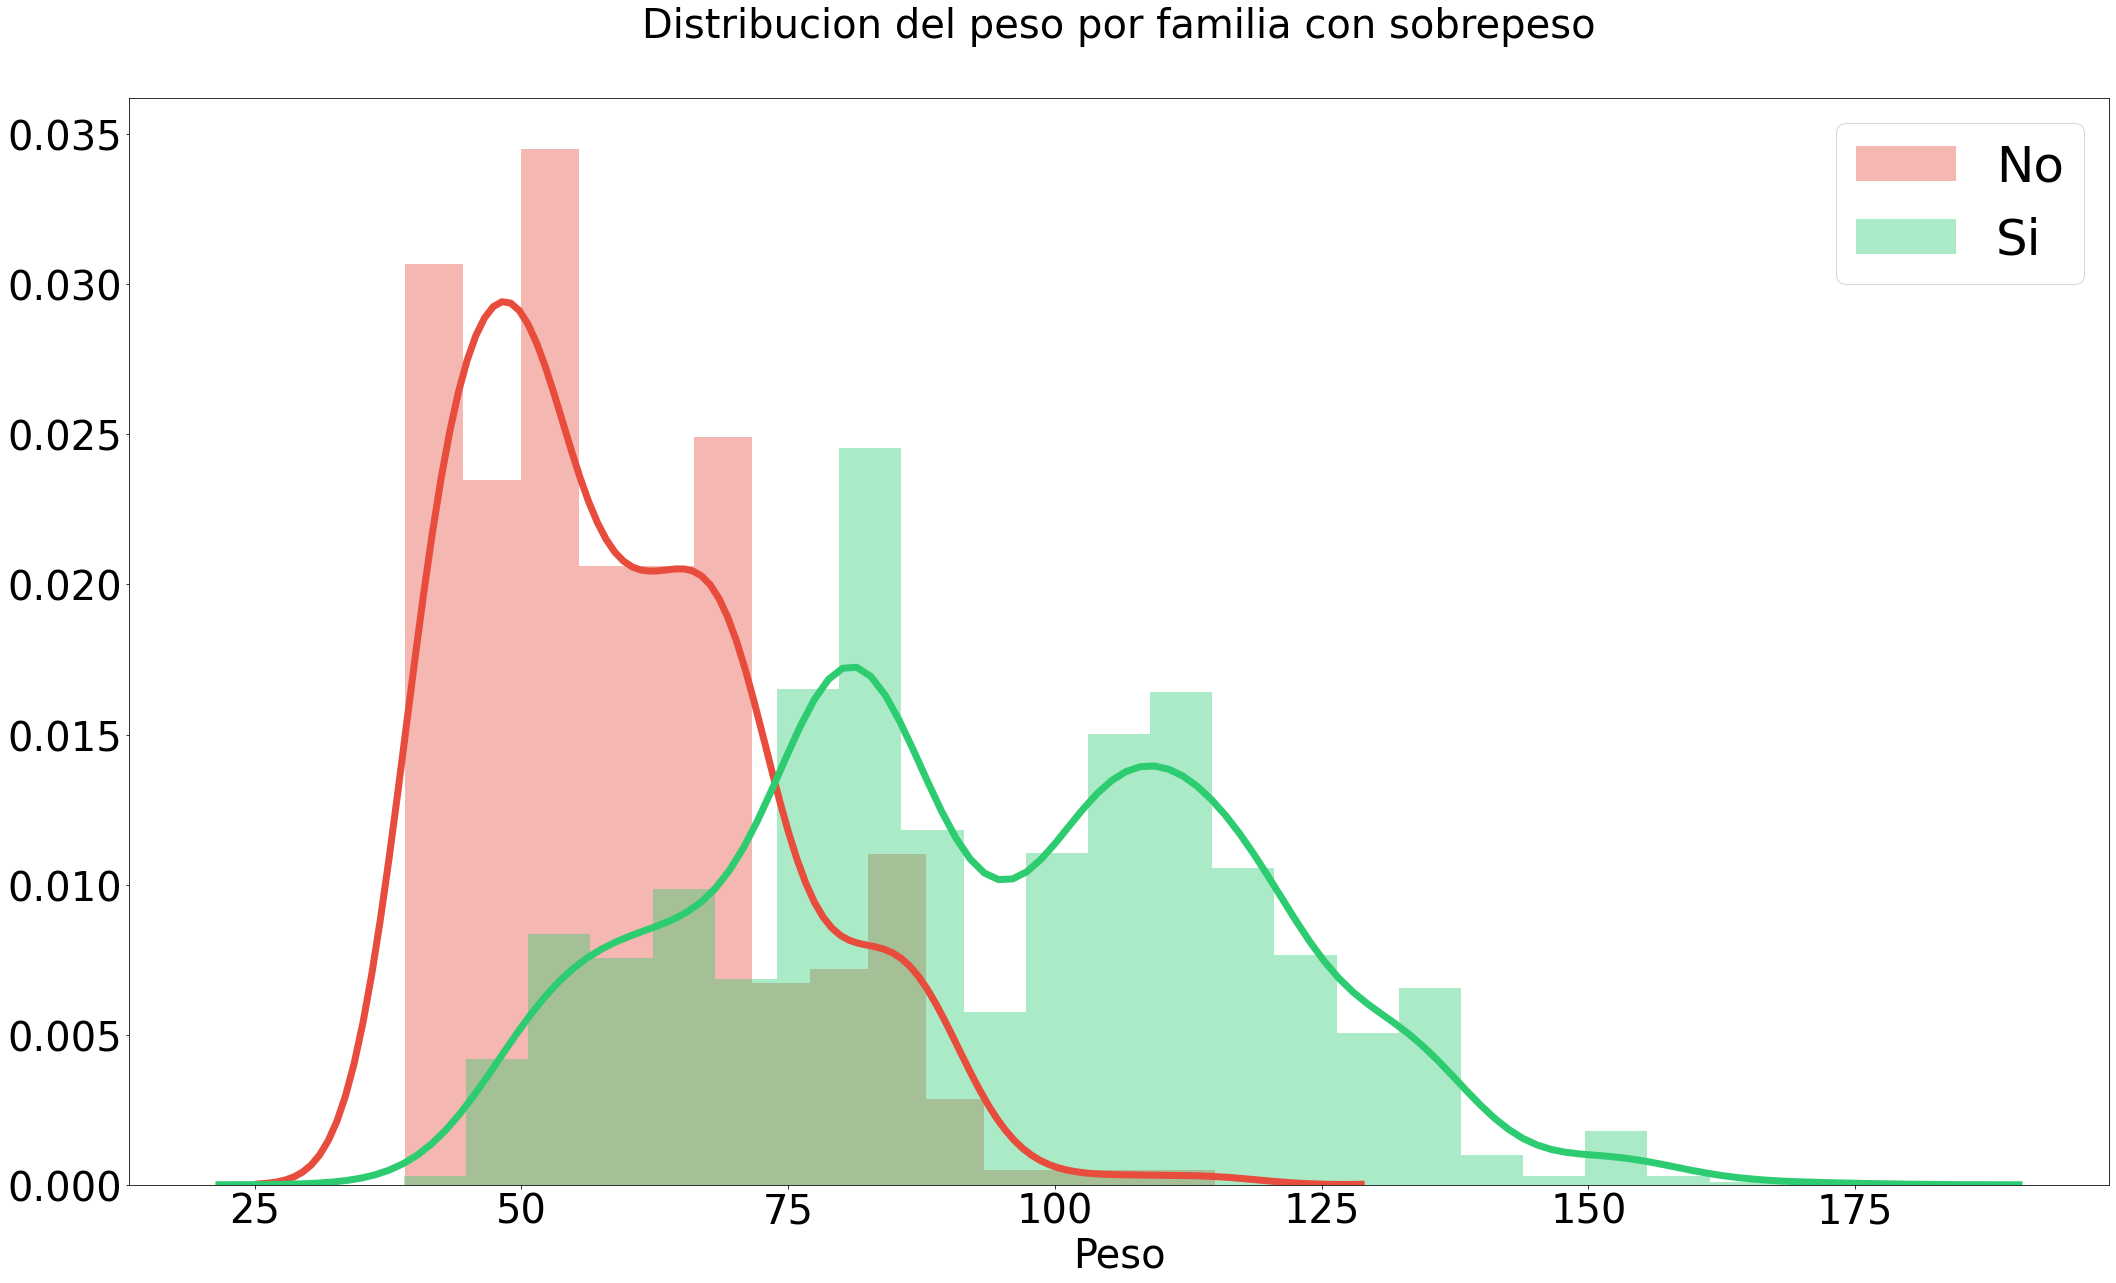

In [144]:
credit = data['family_history_with_overweight'] == 1
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

# Distribution of feature in dataset
#sns.distplot(dataset["Edad"], label='Distribucion de edad', hist=False, color='#e74c3c', ax=axs)
sns.distplot(data[~credit]["Weight"], label='No', hist=True, color='#e74c3c', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[credit]["Weight"], label='Si', hist=True, color='#2ecc71', ax=axs,kde_kws=dict(linewidth=7))
    
axs.tick_params(axis='x', labelsize=40)
axs.tick_params(axis='y', labelsize=40)
axs.set_xlabel('Peso', fontsize=40)
axs.legend(loc='upper right', prop={'size': 50})
axs.set_title('Distribucion del peso por {}'.format("familia con sobrepeso"), size=40, y=1.05)
    
plt.show()

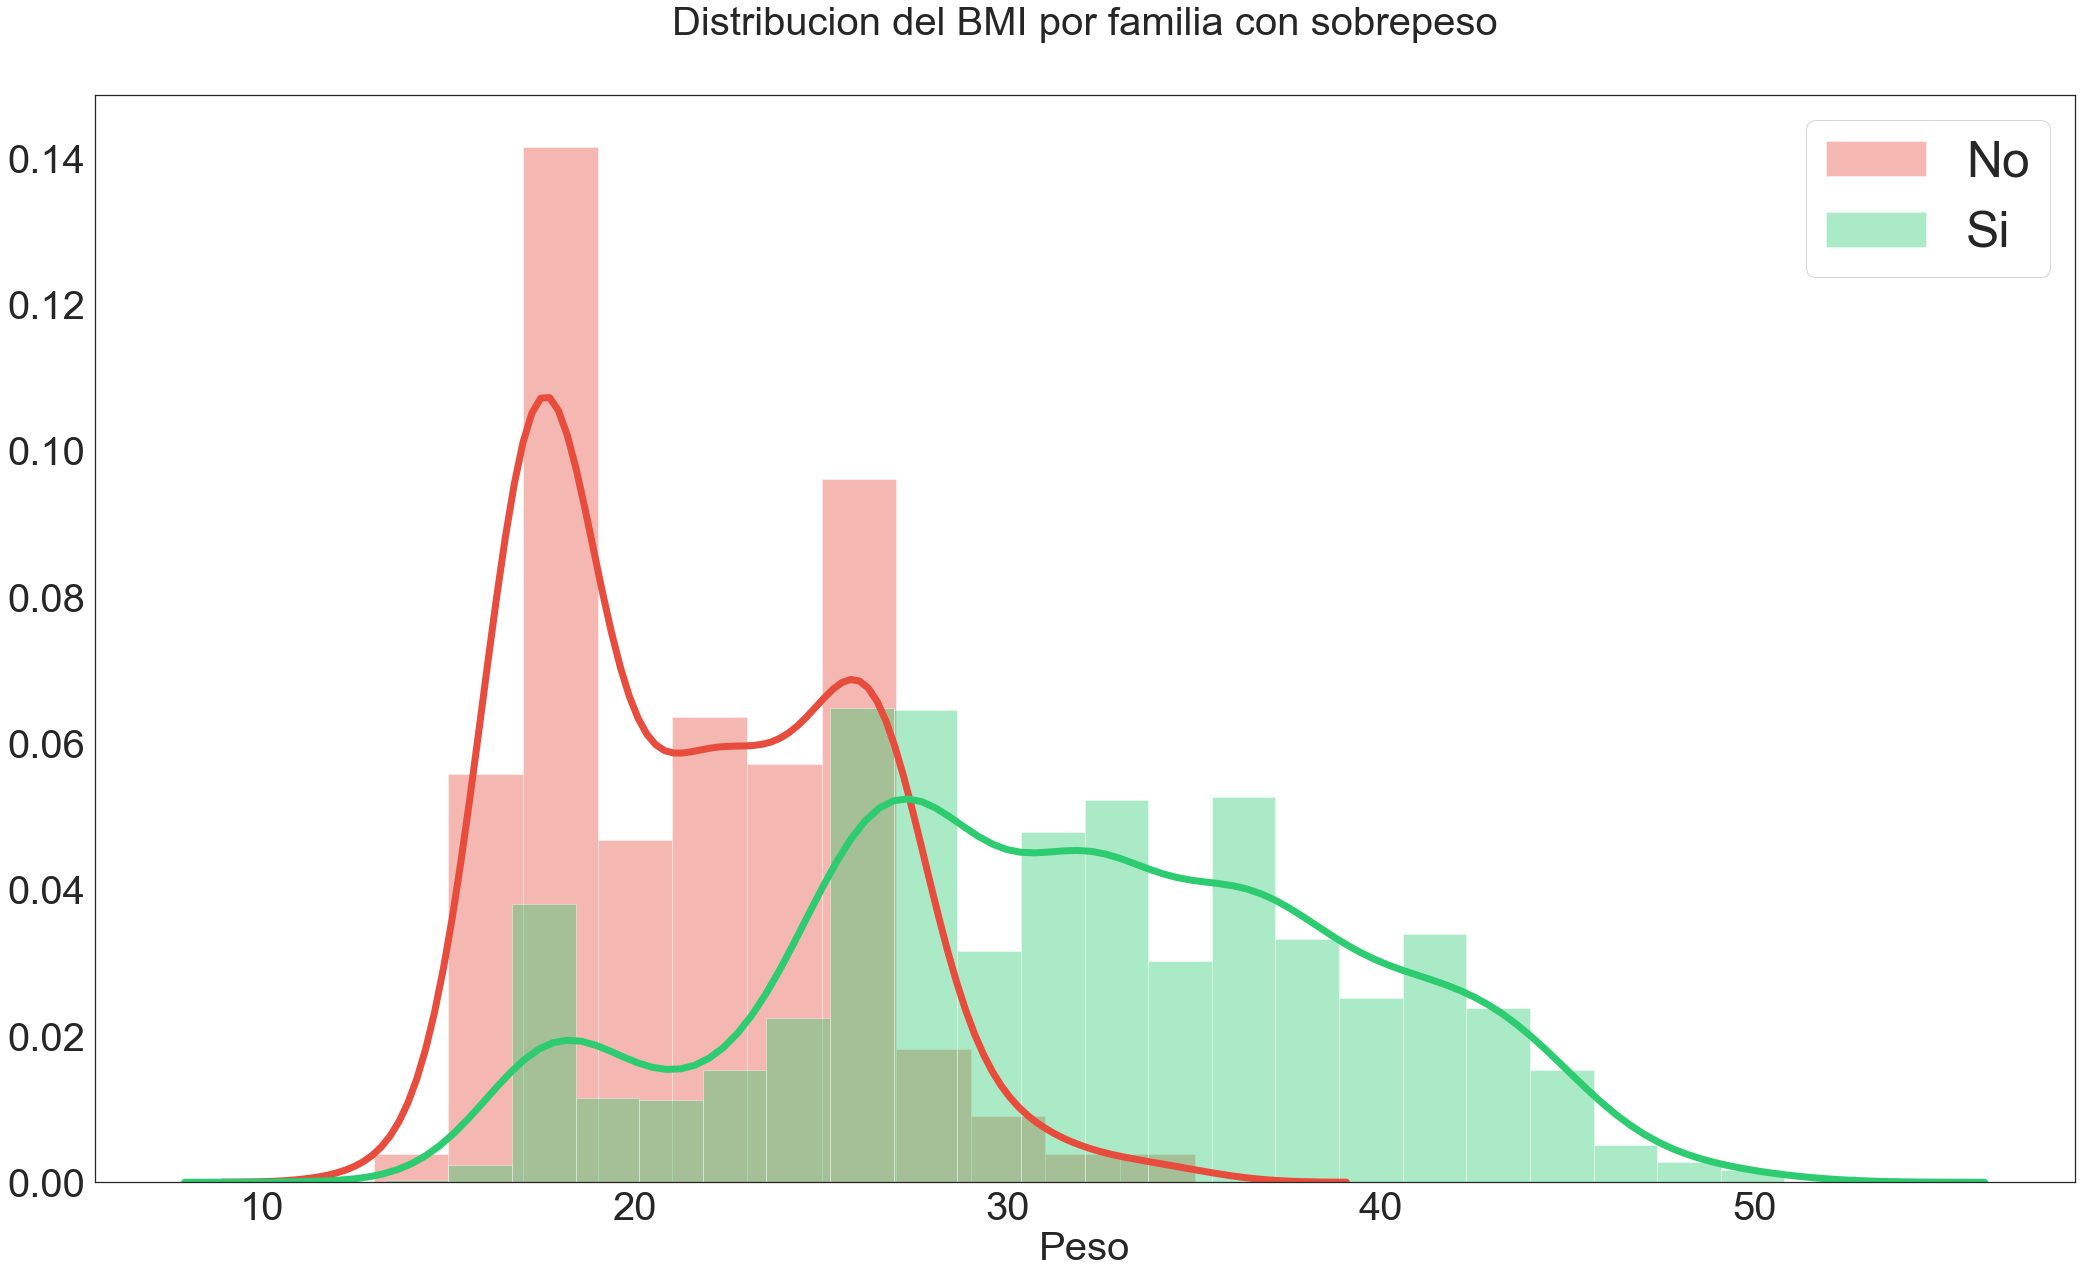

In [176]:
credit = data['family_history_with_overweight'] == 1
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

# Distribution of feature in dataset
#sns.distplot(dataset["Edad"], label='Distribucion de edad', hist=False, color='#e74c3c', ax=axs)
sns.distplot(data[~credit]["BMI"], label='No', hist=True, color='#e74c3c', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[credit]["BMI"], label='Si', hist=True, color='#2ecc71', ax=axs,kde_kws=dict(linewidth=7))
    
axs.tick_params(axis='x', labelsize=40)
axs.tick_params(axis='y', labelsize=40)
axs.set_xlabel('Peso', fontsize=40)
axs.legend(loc='upper right', prop={'size': 50})
axs.set_title('Distribucion del BMI por {}'.format("familia con sobrepeso"), size=40, y=1.05)
    
plt.show()

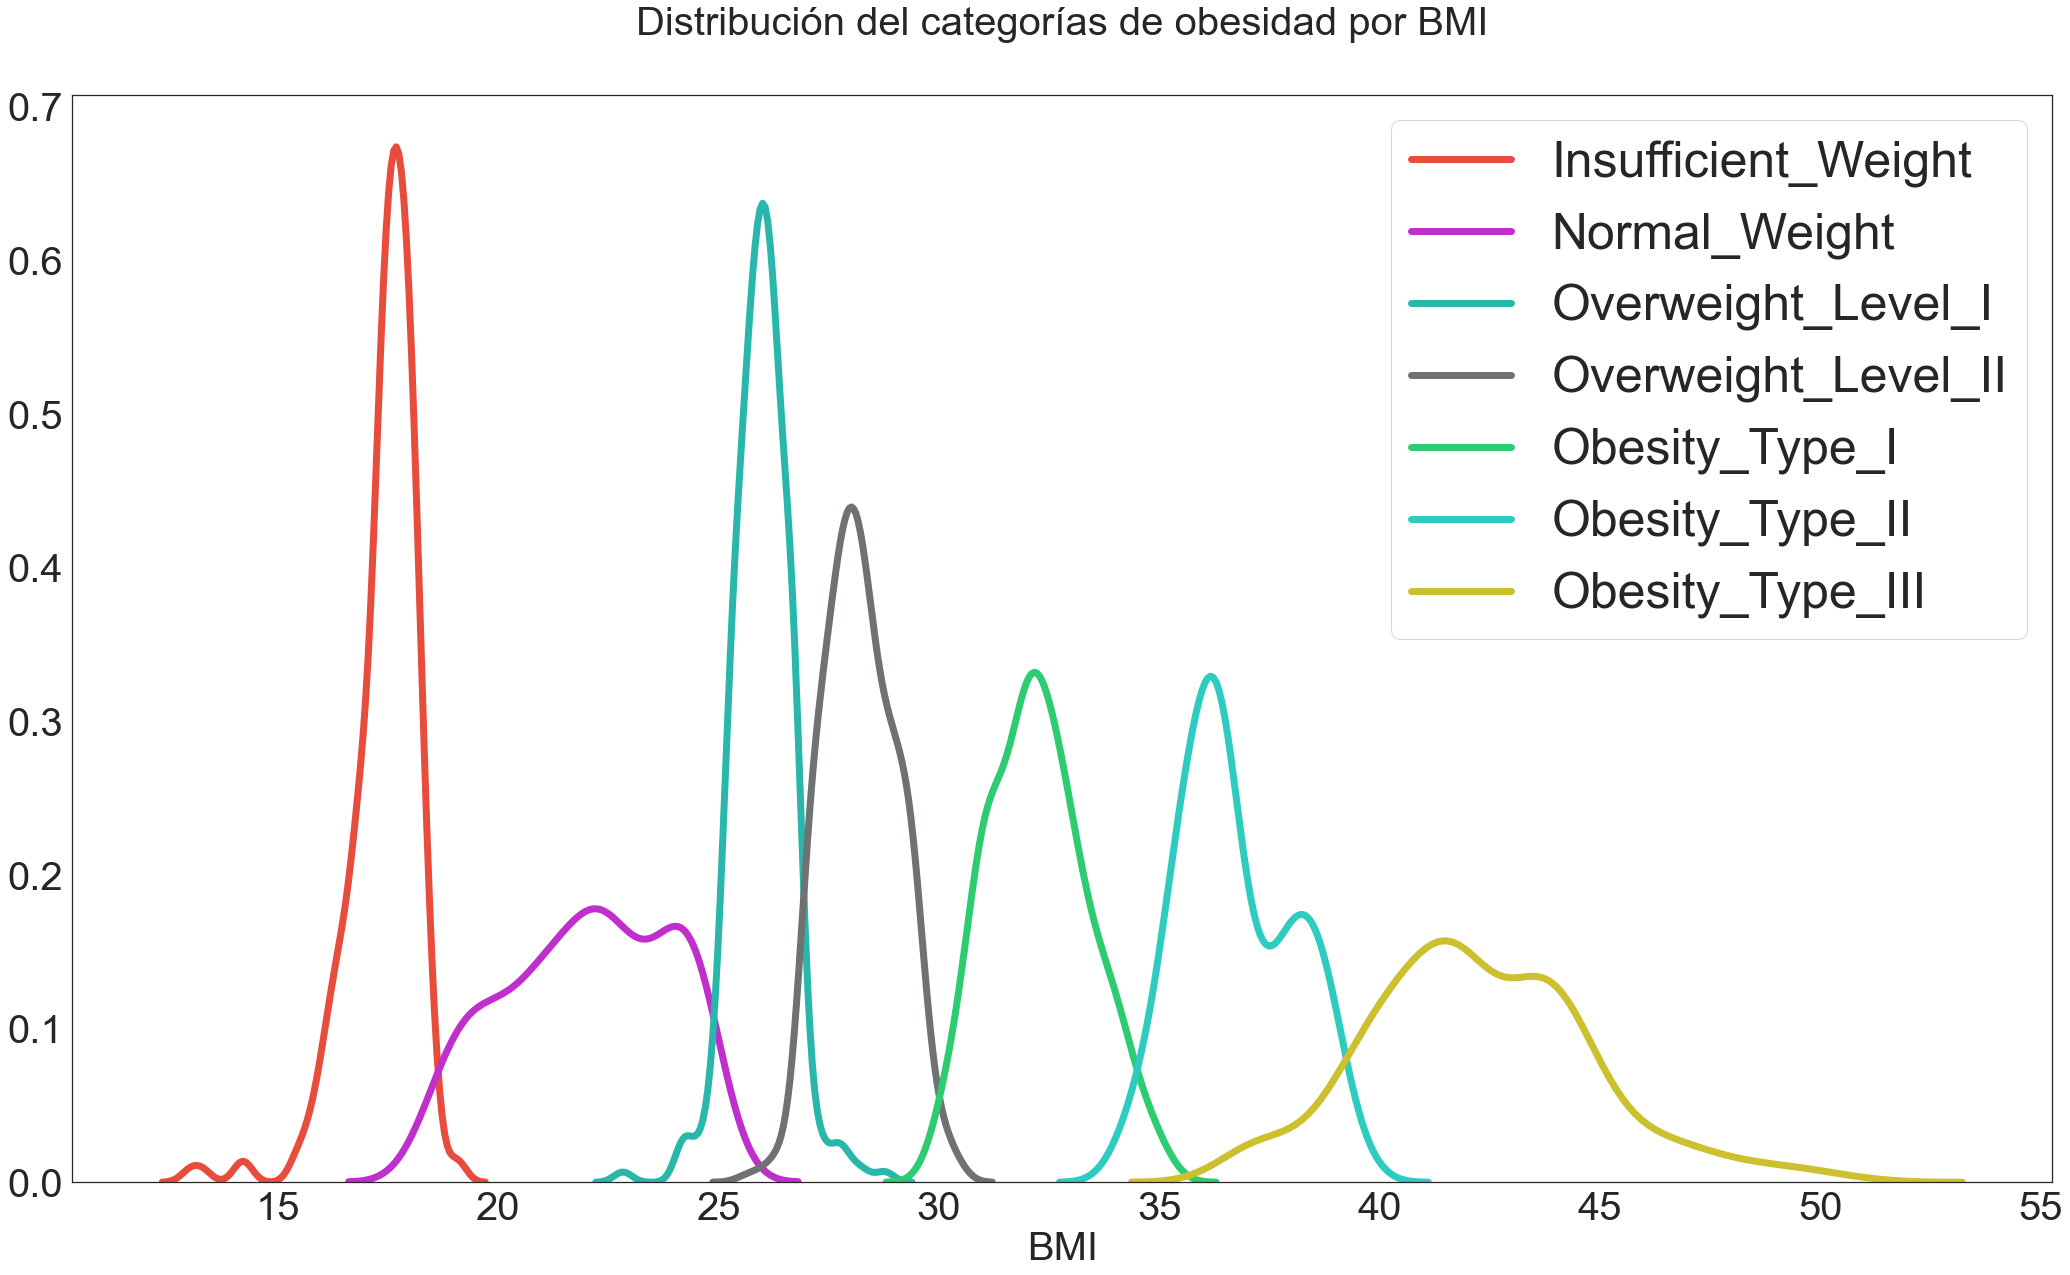

In [169]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

# Distribution of feature in dataset
#sns.distplot(dataset["Edad"], label='Distribucion de edad', hist=False, color='#e74c3c', ax=axs)
sns.distplot(data[data["NObeyesdad"]=="Insufficient_Weight"]["BMI"], label='Insufficient_Weight', hist=False, color='#e74c3c', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Normal_Weight"]["BMI"], label='Normal_Weight', hist=False, color='#c02ecc', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_I"]["BMI"], label='Overweight_Level_I', hist=False, color='#29b7ac', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_II"]["BMI"], label='Overweight_Level_II', hist=False, color='#6e7272', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_I"]["BMI"], label='Obesity_Type_I', hist=False, color='#2ecc71', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_II"]["BMI"], label='Obesity_Type_II', hist=False, color='#2eccc0', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_III"]["BMI"], label='Obesity_Type_III', hist=False, color='#ccc02e', ax=axs,kde_kws=dict(linewidth=7))
axs.tick_params(axis='x', labelsize=40)
axs.tick_params(axis='y', labelsize=40)
axs.set_xlabel('BMI', fontsize=40)
axs.legend(loc='upper right', prop={'size': 50})
axs.set_title('Distribución del categorías de obesidad por {}'.format("BMI"), size=40, y=1.05)
    
plt.show()

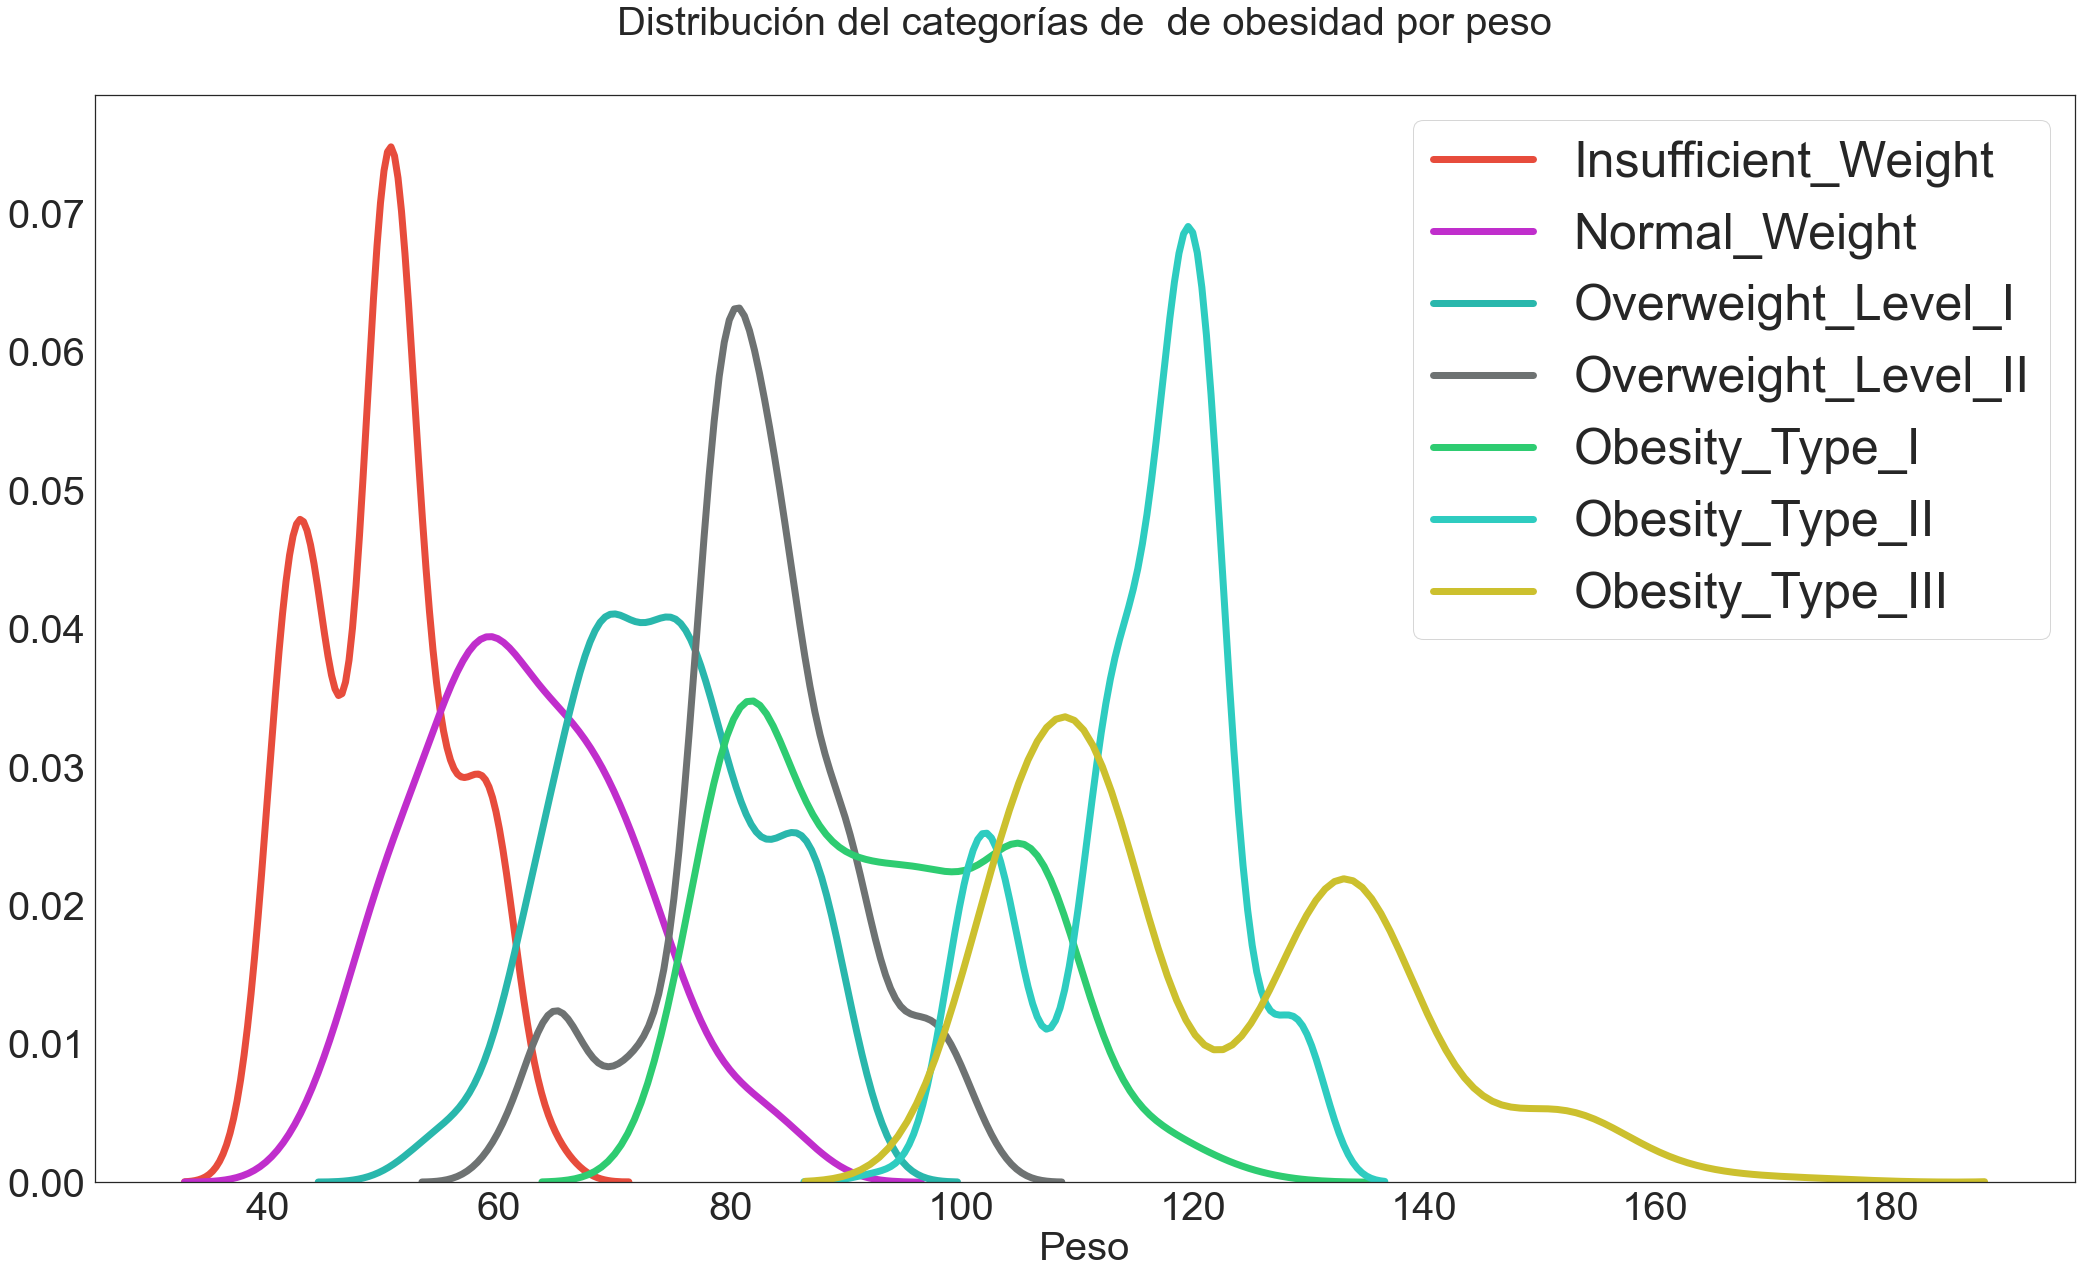

In [168]:
fig, axs = plt.subplots(ncols=1, nrows=1, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

# Distribution of feature in dataset
#sns.distplot(dataset["Edad"], label='Distribucion de edad', hist=False, color='#e74c3c', ax=axs)
sns.distplot(data[data["NObeyesdad"]=="Insufficient_Weight"]["Weight"], label='Insufficient_Weight', hist=False, color='#e74c3c', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Normal_Weight"]["Weight"], label='Normal_Weight', hist=False, color='#c02ecc', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_I"]["Weight"], label='Overweight_Level_I', hist=False, color='#29b7ac', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Overweight_Level_II"]["Weight"], label='Overweight_Level_II', hist=False, color='#6e7272', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_I"]["Weight"], label='Obesity_Type_I', hist=False, color='#2ecc71', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_II"]["Weight"], label='Obesity_Type_II', hist=False, color='#2eccc0', ax=axs,kde_kws=dict(linewidth=7))
sns.distplot(data[data["NObeyesdad"]=="Obesity_Type_III"]["Weight"], label='Obesity_Type_III', hist=False, color='#ccc02e', ax=axs,kde_kws=dict(linewidth=7))

axs.tick_params(axis='x', labelsize=40)
axs.tick_params(axis='y', labelsize=40)
axs.set_xlabel('Peso', fontsize=40)
axs.legend(loc='upper right', prop={'size': 50})
axs.set_title('Distribución del categorías de  de obesidad por {}'.format("peso"), size=40, y=1.05)
axs.grid(False)    
plt.show()

In [93]:
len(data)

2111

In [96]:
0.8*len(data)

1688.8000000000002

In [97]:
0.2*len(data)

422.20000000000005

In [98]:
0.15*len(data)

316.65

In [100]:
100/7

14.285714285714286